<a href="https://colab.research.google.com/github/Kapoortigers007/Pankaj_Product_Dissection_for_Instagram/blob/main/Pankaj_Product_Dissection_for_Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Product Dissection for Instagram

***Name-Pankaj***

#**GitHub Link-**

https://github.com/Kapoortigers007/Product_Dissection_for_Instagram

In [ ]:
import sqlite3

conn = sqlite3.connect('instagram.db')

c = conn.cursor()

In [ ]:
# Create Users table
c.execute('''
          CREATE TABLE Users
          (UserID integer PRIMARY KEY,
           Username text,
           Email text,
           FullName text,
           Bio text,
           JoinedDate text)
          ''')


OperationalError: table Users already exists

The Instagram schema defines relationships through the use of foreign keys, which connect distinct tables. Let's go over each relationship using the SQLite schema that was provided:

##Users make posts:

#Relationship:
 Each user can make several entries.
#Foreign Key:
The UserID column in the posts table is a foreign key that references the UserID column in the users table.
Meaning: This relationship ensures that each post is associated with a genuine user. Users, defined by their UserID, can create multiple posts.


In [ ]:
# Create Posts table
c.execute('''
          CREATE TABLE Posts
          (PostID integer PRIMARY KEY,
           UserID integer,
           ImageURL text,
           Caption text,
           PostedDate text,
           FOREIGN KEY(UserID) REFERENCES Users(UserID))
          ''')

# Users leave comments on posts:

#Relationship:
Users can comment on many posts, and each post can have multiple comments.
#Foreign Keys:

The PostID column in the comments table is a foreign key that references the PostID column in the posts table.


The UserID column in the comments table is a foreign key that refers to the UserID column in the users table.


Meaning: This relationship ensures that each remark is associated with a genuine post and a valid user. Users can comment on numerous posts, and each post can have several comments.



In [ ]:
# Create Comments table
c.execute('''
          CREATE TABLE Comments
          (CommentID integer PRIMARY KEY,
           PostID integer,
           UserID integer,
           Text text,
           CommentDate text,
           FOREIGN KEY(PostID) REFERENCES Posts(PostID),
           FOREIGN KEY(UserID) REFERENCES Users(UserID))
          ''')


# Posts that users like:

#Relationship:
Users can like numerous posts, and each post can have several likes.
#Foreign Keys:
The PostID column in the likes table is a foreign key that references the PostID column in the posts table.

The UserID column in the likes table is a foreign key that refers to the UserID column in the users table.

#Meaning:
This relationship ensures that every like is associated with a valid post and a valid user.
Users can like numerous posts, and each post can have multiple likes.



In [ ]:

# Create Likes table
c.execute('''
          CREATE TABLE Likes
          (LikeID integer PRIMARY KEY,
           PostID integer,
           UserID integer,
           LikedDate text,
           FOREIGN KEY(PostID) REFERENCES Posts(PostID),
           FOREIGN KEY(UserID) REFERENCES Users(UserID))
          ''')

#Users who follow others:

Users can follow and be followed by multiple people.
#Keys from other countries:
The ForeignKey column in the followers table refers to the UserID column in the users table.

The FollowerUserID column in the followers table is a foreign key to the UserID column in the users table.

This relationship assures that both the following and following users are valid users.

Users can follow numerous people, and each person can follow multiple people.


In [ ]:

# Create Follows table
c.execute('''
          CREATE TABLE Follows
          (FollowID integer PRIMARY KEY,
           FollowingUserID integer,
           FollowerUserID integer,
           FollowDate text,
           FOREIGN KEY(FollowingUserID) REFERENCES Users(UserID),
           FOREIGN KEY(FollowerUserID) REFERENCES Users(UserID))
         ''')


#Hashtags are used in posts:

#Relationship:
Each hashtag can be associated with many posts, and each post can have several hashtags.
#Keys from Other Countries:

The PostID column in the post_hashtags table is a foreign key that refers to the PostID column in the posts table.

The post_hashtags table's HashtagID column is a foreign key that refers to the hashtags table's HashtagID column.
#Meaning:
This relationship maintains the validity of all post-hashtag associations.
many hashtags can be associated with a single post, and each hashtag can be associated with many posts.

These foreign key relationships provide data integrity and enforce linkages between various entities in the Instagram database model.


In [ ]:
# Create Hashtags table
c.execute('''
         CREATE TABLE Hashtags
         (HashtagID integer PRIMARY KEY,
          Tag text)
         ''')

In [ ]:

# Create PostHashtags table
c.execute('''
         CREATE TABLE PostHashtags
         (PostHashtagID integer PRIMARY KEY,
          PostID integer,
          HashtagID integer,
          FOREIGN KEY(PostID) REFERENCES Posts(PostID),
          FOREIGN KEY(HashtagID) REFERENCES Hashtags(HashtagID))
         ''')

conn.commit()
conn.close()

## ***ER Diagram***

In [ ]:
# Install Graphviz (Run once)
!apt-get install graphviz -y
!pip install graphviz

from graphviz import Digraph
from IPython.display import display, Image



In [ ]:
# Create ER Diagram (Vertical Layout)
er = Digraph('Instagram_ER_Diagram', format='png')
er.attr(rankdir='TB', size='20')


In [ ]:
# Function to create vertical table
def create_table(name, fields):
    table = f'''<
    <TABLE BORDER="1" CELLBORDER="1" CELLSPACING="0">
        <TR><TD BGCOLOR="lightblue"><B>{name}</B></TD></TR>
    '''
    for field in fields:
        table += f'<TR><TD ALIGN="LEFT">{field}</TD></TR>'
    table += '</TABLE>>'
    return table

In [ ]:
er.node('Users', create_table('Users', [
    'UserID (PK)',
    'Username',
    'Email',
    'FullName',
    'Bio',
    'JoinedDate'
]))

er.node('Posts', create_table('Posts', [
    'PostID (PK)',
    'UserID (FK)',
    'ImageURL',
    'Caption',
    'PostedDate'
]))

er.node('Comments', create_table('Comments', [
    'CommentID (PK)',
    'PostID (FK)',
    'UserID (FK)',
    'Text',
    'CommentDate'
]))

er.node('Likes', create_table('Likes', [
    'LikeID (PK)',
    'PostID (FK)',
    'UserID (FK)',
    'LikedDate'
]))

er.node('Follows', create_table('Follows', [
    'FollowID (PK)',
    'FollowingUserID (FK)',
    'FollowerUserID (FK)',
    'FollowDate'
]))

er.node('Hashtags', create_table('Hashtags', [
    'HashtagID (PK)',
    'Tag'
]))

er.node('PostHashtags', create_table('PostHashtags', [
    'PostHashtagID (PK)',
    'PostID (FK)',
    'HashtagID (FK)'
]))

In [ ]:
# Relationships
# Users Relationships
er.edge('Users', 'Posts', label='1:N')
er.edge('Users', 'Comments', label='1:N')
er.edge('Users', 'Likes', label='1:N')


In [ ]:
# Self Relationship (Follow)
er.edge('Users', 'Follows', label='1:N (Following')
er.edge('Users', 'Follows', label='1:N (Follower')
er.edge('Users', 'Follows', label='1:N (Follow)')


In [ ]:
# Posts Relationships
er.edge('Posts', 'Comments', label='1:N')
er.edge('Posts', 'Likes', label='1:N')

In [ ]:
# Hashtag Many-to-Many
er.edge('Posts', 'PostHashtags', label='1:N')
er.edge('Hashtags', 'PostHashtags', label='1:N')

In [ ]:
# Save Diagram
er.render('Instagram_ER_Diagram_Final', cleanup=True)


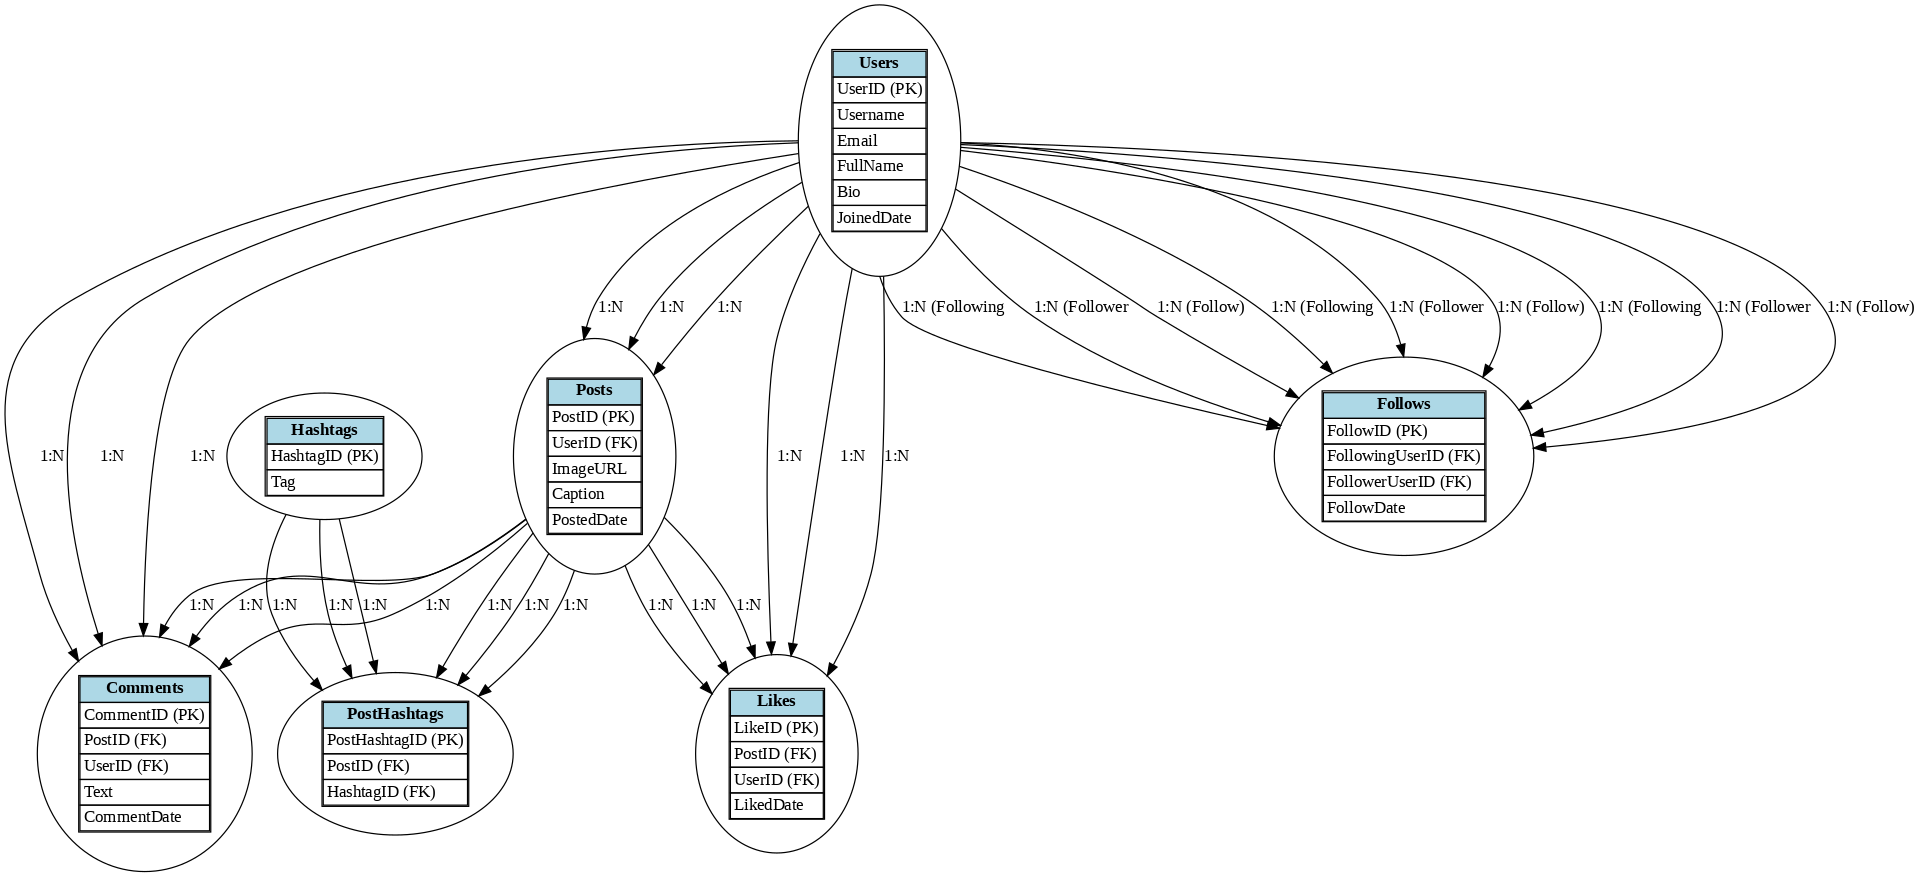

'Instagram_ER_Code_Final.dot'

In [93]:
# Display Diagram in Colab Output
display(Image('Instagram_ER_Diagram_Final.png'))

er.save('Instagram_ER_Code_Final.dot')


# **Conclusion**:

In this case study, we delved into the design of Instagram's schema and Entity-Relationship diagram. Instagram has revolutionised the way people share and engage with visual content, fostering connections and creative expression. The platform's intricate data model, consisting of entities like users, posts, comments, likes, followers, hashtags, and associations, forms the foundation for its seamless functionality. By understanding this schema, we gain insight into how Instagram effectively manages the complexities of user interactions and content sharing, contributing to its widespread popularity and continued growth in the world of social media.